In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
import plotly
import cufflinks as cf
import plotly.express as px

# 오프라인 모드에서도 인터렉티브한 그래픽을 가능하도록 함
from plotly.offline import download_plotlyjs,init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

# 한글 패치
from matplotlib import rc
rc('font', family='AppleGothic')

# 통계 분석
import scipy.stats

# ignore warnings
import warnings
warnings.filterwarnings(action='ignore')


In [2]:
input_path = './input/'
output_path = './output/'

In [3]:
# 데이터 로드
burger_df = pd.read_csv(input_path+'burger_df.csv')
nstore_df = pd.read_csv(input_path+'nstore_df.csv')
nstore_stat_df = pd.read_csv(input_path+'nstore_stat_df.csv')
final_df = pd.read_csv(input_path+'nstore_stat_df_2.csv')

burger_df.shape, nstore_df.shape, nstore_stat_df.shape, final_df.shape

((2306, 6), (224, 9), (17, 13), (224, 12))

In [4]:
burger_df.head()

,지점명,주소,브랜드,주소1,주소2,주소3
0,선릉역점,서울특별시 강남구 선릉로 429,버거킹,서울특별시,강남구,선릉로 429
1,대치역점,서울특별시 강남구 남부순환로 2936,버거킹,서울특별시,강남구,남부순환로 2936
2,차병원사거리점,서울특별시 강남구 봉은사로 179,버거킹,서울특별시,강남구,봉은사로 179
3,강남도곡점,서울특별시 강남구 논현로 172 (도곡동 410-10) 1층,버거킹,서울특별시,강남구,논현로 172 (도곡동 410-10) 1층
4,청담점,서울특별시 강남구 선릉로 812,버거킹,서울특별시,강남구,선릉로 812


In [5]:
nstore_df.head()

,버거킹,KFC,맥도날드,롯데리아,BKM,버거지수,주소,주소1,주소2
0,1,0,1,6,2,0.333333,강원도 강릉시,강원도,강릉시
1,1,0,1,3,2,0.666667,강원도 속초시,강원도,속초시
2,3,1,2,15,6,0.400000,강원도 원주시,강원도,원주시
3,2,2,2,7,6,0.857143,강원도 춘천시,강원도,춘천시
4,2,0,0,2,2,1.000000,강원도 홍천군,강원도,홍천군


In [6]:
nstore_stat_df.head()

,버거킹,KFC,맥도날드,롯데리아,BKM,버거지수,시도별,1인당 지역내총생산,1인당 지역총소득,1인당 개인소득,1인당 민간소비,인구,인구밀도
0,9,3,7,54,19,0.351852,강원도,32061,29392,18997,16811,1521,90
1,100,50,96,317,246,0.776025,경기도,36133,38466,20482,17399,12786,1255
2,24,4,29,86,57,0.662791,경상남도,33690,32140,18939,16426,3339,317
3,25,4,15,68,44,0.647059,경상북도,40272,34873,18611,16217,2675,141
4,15,3,10,42,28,0.666667,광주광역시,27548,30964,20532,18231,1495,2984


In [7]:
final_df.head()

,버거킹,KFC,맥도날드,롯데리아,BKM,버거지수,주소,주소1,주소2,인구수,면적,인구밀도
0,1,0,1,6,2,0.333333,강원도 강릉시,강원도,강릉시,213442,1040.783864,205.078122
1,1,0,1,3,2,0.666667,강원도 속초시,강원도,속초시,81786,105.760448,773.313668
2,3,1,2,15,6,0.400000,강원도 원주시,강원도,원주시,349215,868.240238,402.210108
3,2,2,2,7,6,0.857143,강원도 춘천시,강원도,춘천시,281291,1116.373900,251.968449
4,2,0,0,2,2,1.000000,강원도 홍천군,강원도,홍천군,69150,1820.310462,37.988025


# 광역시도별
## 1. 버거지수와 경제지표와의 상관관계

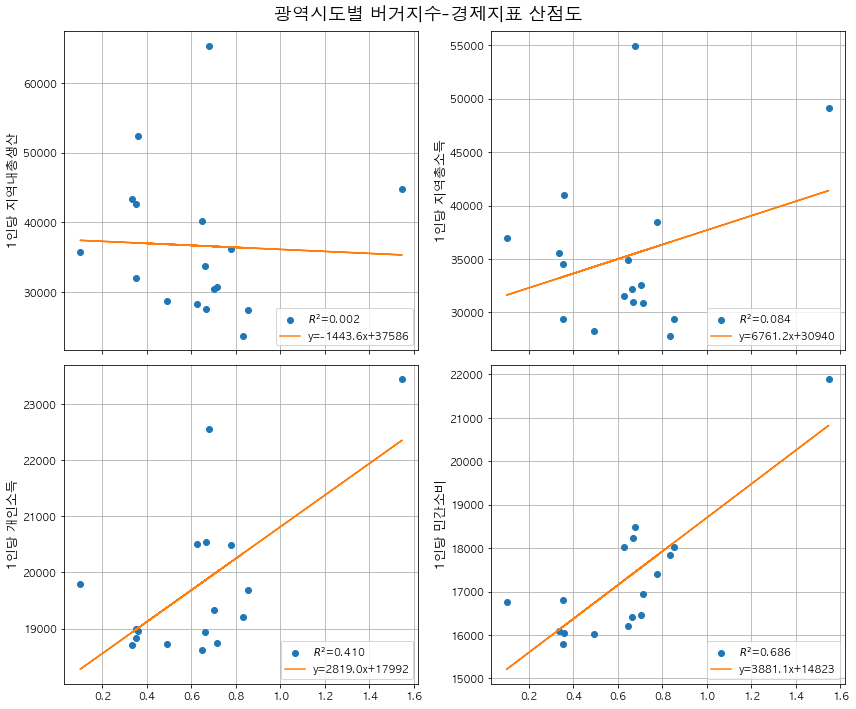

In [8]:
x = nstore_stat_df["버거지수"]
col_label = ['1인당 지역내총생산', '1인당 지역총소득','1인당 개인소득', '1인당 민간소비']

fig, axes = plt.subplots(2,2, figsize=(12,10), sharex=True)

ncol = 0
for i in range(2):
    for j in range(2):
        ax = axes[i][j]
        y_label = col_label[ncol]
        y = np.array(nstore_stat_df[y_label].tolist())
        
        z = np.polyfit(x,y,1)
        f = np.poly1d(z)
        
        R = np.corrcoef(x, y)[0][1]
#         r = scipy.stats.pearsonr(x,y)[0]
#         print(abs(R-r)<1e-6)
        
        ax.plot(x, y,'o', label=r'$R^{2}$'+'={:.3f}'.format(R**2))
        ax.plot(x, f(x), label='y={:.1f}x+{:.0f}'.format(z[0],z[1]))
        ax.set_ylabel(y_label, fontsize=13)
        ax.grid(True)
        ax.legend(loc=4)

        ncol += 1

plt.suptitle("광역시도별 버거지수-경제지표 산점도", fontsize=18)
plt.tight_layout()

[comments] 
- 경제 지표별로 회귀선 차이가 꽤 난다. 
- 1인당 개인소득($R^{2}$=0.41) 또는 1인당 민간소비($R^{2}$=0.686) 지표가 버거지수가 약한 상관관계를 보이지만, 강하다고 말하기는 어렵다.

*그렇다면 인구수와 인구밀도와는 관계가 있을까?*

## 2 . 버거지수와 인구수, 인구밀도와의 상관관계

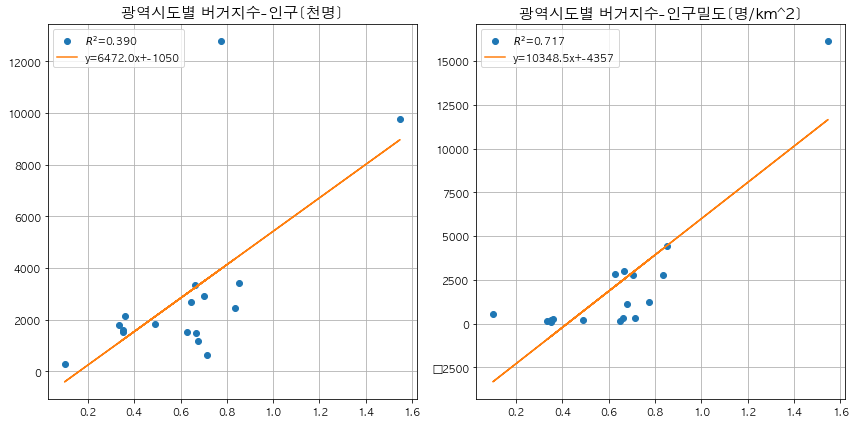

In [9]:
x = nstore_stat_df["버거지수"]
col_label = ["인구", "인구밀도"]
col_scale = ["[천명]","[명/km^2]"]

fig, axes = plt.subplots(1,2, figsize=(12,6))

for i in range(2):
    ax = axes[i]
    y_label = col_label[i]
    y = nstore_stat_df[y_label]
    
    z = np.polyfit(x,y,1)
    f = np.poly1d(z)
    
    R = np.corrcoef(x,y)[0,1]
#     r = scipy.stats.pearsonr(x,y)[0]
#     print(abs(R-r)<1e-6)
    
    ax.plot(x, y,'o', label=r'$R^{2}$'+'={:.3f}'.format(R**2))
    ax.plot(x, f(x), label='y={:.1f}x+{:.0f}'.format(z[0],z[1]))
    ax.set_title("광역시도별 버거지수-"+y_label+col_scale[i], fontsize=15)
    ax.grid(True)
    ax.legend(loc=2)
    
plt.tight_layout()

[comments] 
- 인구수보다는 인구밀도가 버거지수에 더 설명력?있는 지표라고 말할 수 있겠다. 

*시구군별은 어떻게 될까? → 이 후에 확인*   

## 3. 브랜드별 매장수와 경제지표와의 상관관계

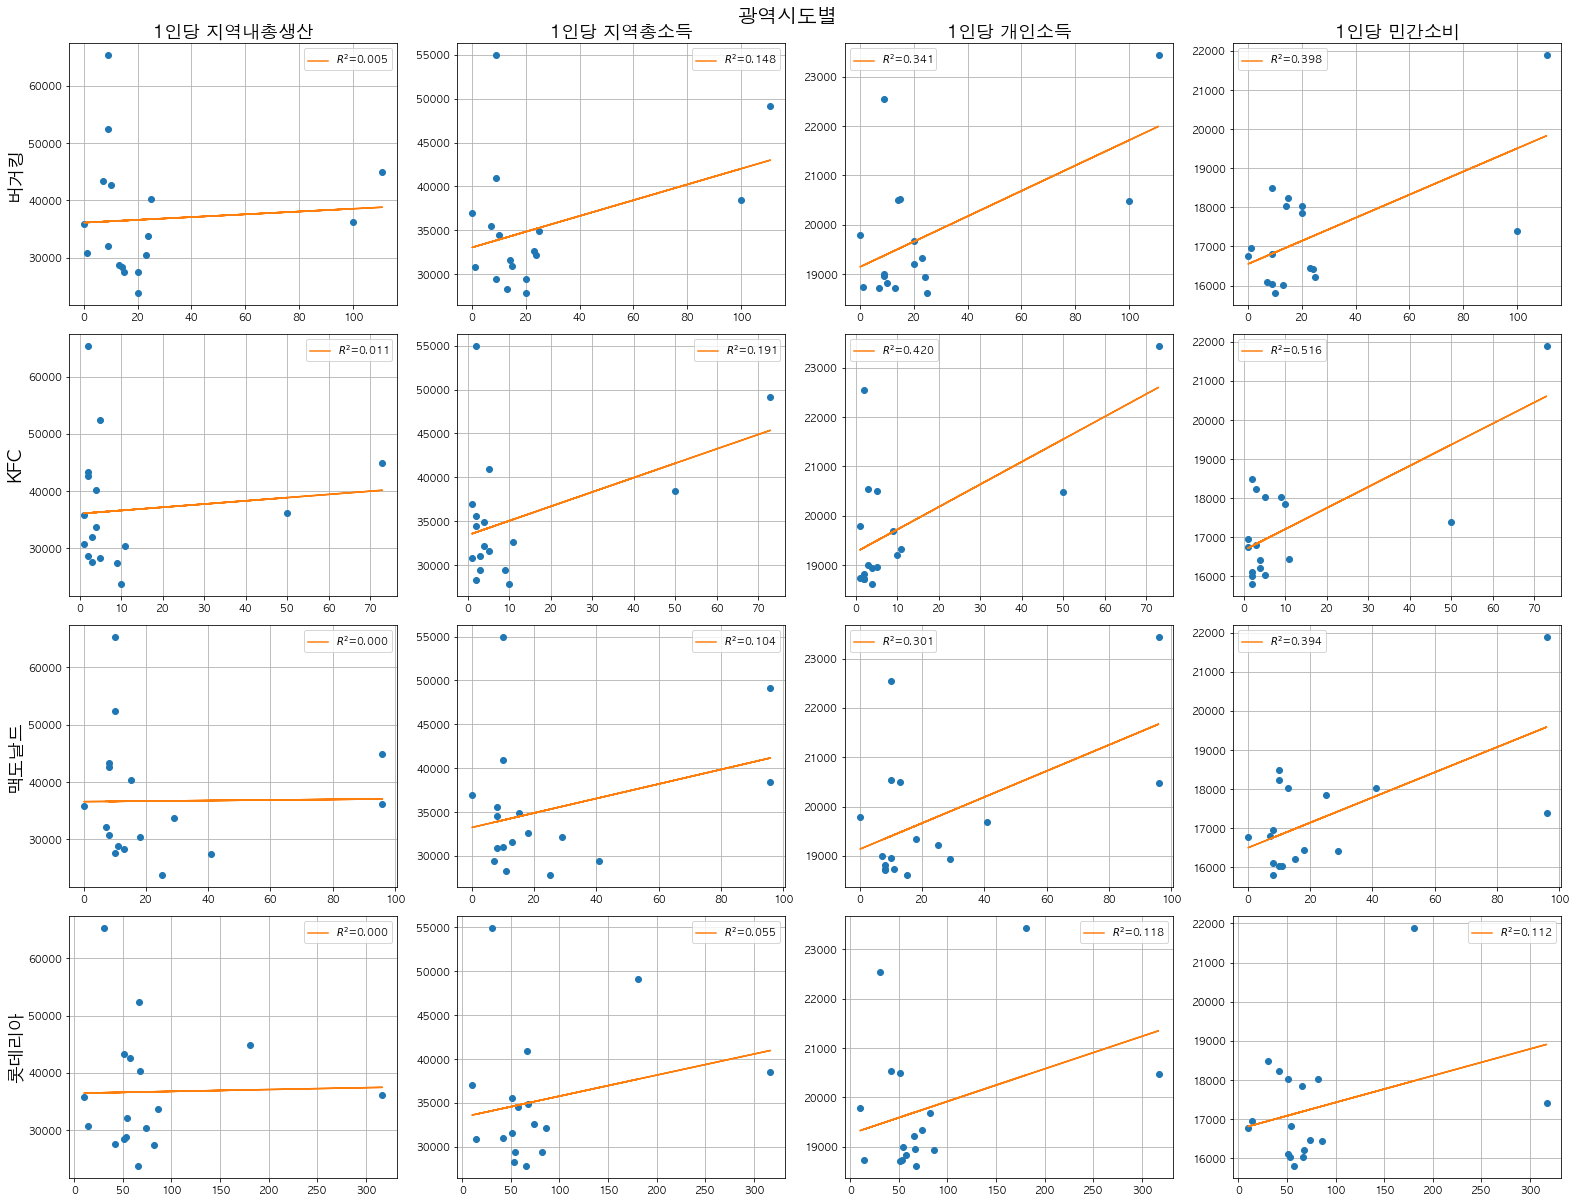

In [10]:
x_labels = [ "버거킹", "KFC","맥도날드","롯데리아"]
y_labels = ['1인당 지역내총생산', '1인당 지역총소득','1인당 개인소득', '1인당 민간소비']

fig, axes = plt.subplots(4,4, figsize=(22,17))

for i in range(4):
    x_label = x_labels[i]
    x = nstore_stat_df[x_label]
    
    for j in range(4):
        ax = axes[i][j]
        y_label = y_labels[j]
        y = np.array(nstore_stat_df[y_label].tolist())
        
        z = np.polyfit(x,y,1)
        f = np.poly1d(z)
        
        R = np.corrcoef(x, y)[0][1]
        
        ax.plot(x, y,'o') #, label=y_label
        ax.plot(x, f(x), label=r'$R^{2}$'+'={:.3f}'.format(R**2))
        if j == 0 :
            ax.set_ylabel(x_label, fontsize=18)
        if i == 0 :
            ax.set_title(y_label, fontsize=18)
        ax.grid(True)
        ax.legend()


plt.suptitle("광역시도별", fontsize=20)
plt.tight_layout()

In [11]:
# 광역시도별 버거지수 대비 인구수
px.scatter(nstore_stat_df, x='버거지수', y='인구', trendline='ols', hover_name='시도별')

### heatmap 그리기

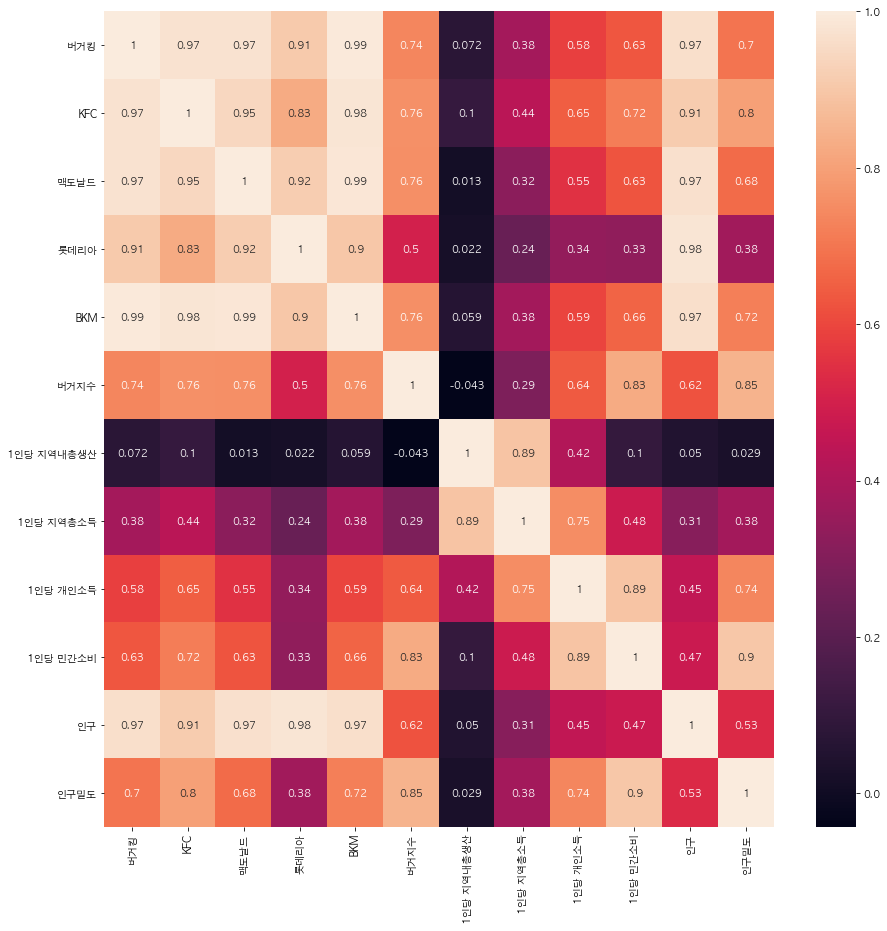

In [12]:
# all_correlation
plt.figure(figsize=(15,15))
sns.heatmap(nstore_stat_df.corr(), annot=True)
plt.show()

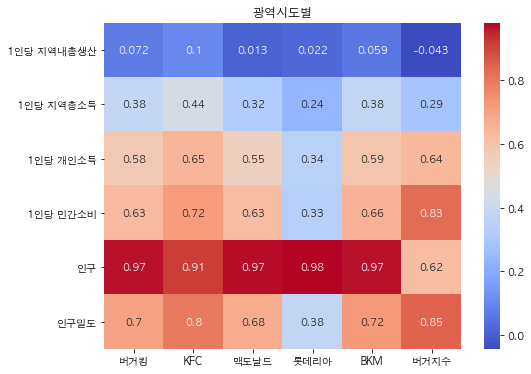

In [13]:
# 버거 브랜드 - 경제 지표 및 인구의 상관관계
R_df = nstore_stat_df.corr().iloc[:6, 6:]
fig = plt.figure(figsize=(8,6))
sns.heatmap(R_df.T, annot=True, cmap='coolwarm')
plt.title("광역시도별")
plt.show()

fig.savefig(output_path+"burger-eco-heatmap.png")

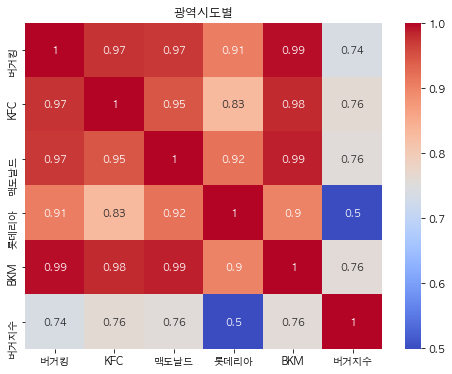

In [14]:
# 버거 브랜드끼리의 상관관계
bidx_df = nstore_stat_df.corr().iloc[:6,:6]
plt.figure(figsize=(8,6))
sns.heatmap(bidx_df, annot=True, cmap='coolwarm')
plt.title("광역시도별")
plt.show()

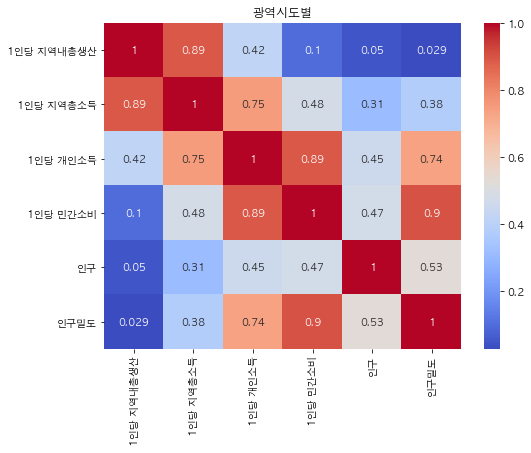

In [15]:
# 경제 지표 및 인구끼리의 상관관계
idx_df = nstore_stat_df.corr().iloc[6:,6:]
plt.figure(figsize=(8,6))
sns.heatmap(idx_df, annot=True, cmap='coolwarm')
plt.title("광역시도별")
plt.show()

In [16]:
final_df.head()

,버거킹,KFC,맥도날드,롯데리아,BKM,버거지수,주소,주소1,주소2,인구수,면적,인구밀도
0,1,0,1,6,2,0.333333,강원도 강릉시,강원도,강릉시,213442,1040.783864,205.078122
1,1,0,1,3,2,0.666667,강원도 속초시,강원도,속초시,81786,105.760448,773.313668
2,3,1,2,15,6,0.400000,강원도 원주시,강원도,원주시,349215,868.240238,402.210108
3,2,2,2,7,6,0.857143,강원도 춘천시,강원도,춘천시,281291,1116.373900,251.968449
4,2,0,0,2,2,1.000000,강원도 홍천군,강원도,홍천군,69150,1820.310462,37.988025


# 시군구별
## 1. 버거지수와 인구수, 인구밀도의 상관관계

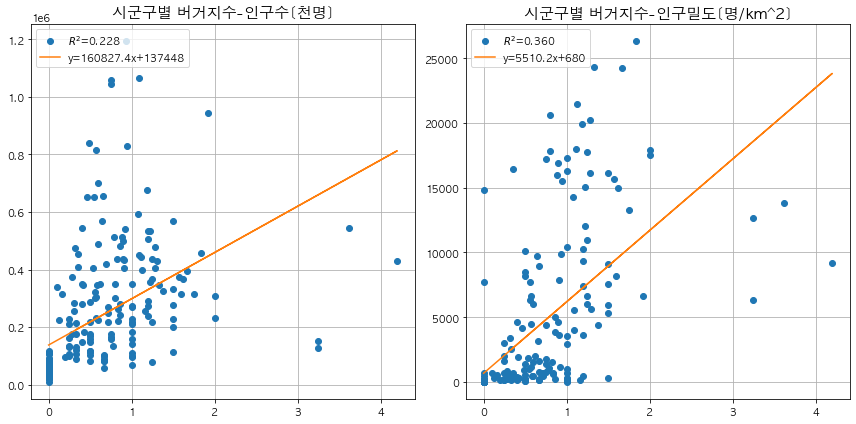

In [17]:
x = final_df["버거지수"]
col_label = ["인구수", "인구밀도"]
col_scale = ["[천명]","[명/km^2]"]

fig, axes = plt.subplots(1,2, figsize=(12,6))

for i in range(2):
    ax = axes[i]
    y_label = col_label[i]
    y = final_df[y_label]
    
    z = np.polyfit(x,y,1)
    f = np.poly1d(z)
    
    R = np.corrcoef(x,y)[0,1]
#     r = scipy.stats.pearsonr(x,y)[0]
#     print(abs(R-r)<1e-6)
    
    ax.plot(x, y,'o', label=r'$R^{2}$'+'={:.3f}'.format(R**2))
    ax.plot(x, f(x), label='y={:.1f}x+{:.0f}'.format(z[0],z[1]))
    ax.set_title("시군구별 버거지수-"+y_label+col_scale[i], fontsize=15)
    ax.grid(True)
    ax.legend(loc=2)
    
plt.tight_layout()

In [18]:
# 버거지수에 따른 인구밀도
px.scatter(final_df, x='버거지수', y='인구밀도', trendline='ols', hover_name='주소')

In [19]:
# 버거지수에 따른 인구수
px.scatter(final_df, x='버거지수', y='인구수', trendline='ols', hover_name='주소')

In [20]:
# 버거지수에 따른 인구수 color by 광역시도
fig = px.scatter(final_df, x='버거지수', y='인구수', color='주소1')
fig.write_html(output_path+"burger-pop-scatter.html")
fig

[comments] 
- 광역시도별(인구)로 구한 상관관계보다 약한 상관관계를 보인다.

<U>어떻게 해석해야할까?</U>  
버거지수가 경제지표나 인구수, 인구밀도를 설명하기엔 어려울 수 있다.

버거지수 상위 지역(직선 오른쪽 아래) : 서초구, 강남구 등  
버거지수는 낮지만 인구수는 높은 지역(직선 왼쪽 위) : 수원시, 고양시 등  
→ 유동인구가 많다는 특성이 있다. 유동인구를 기준으로 버거지수를 그리면 더 강한 상관관계를 가질 수도 있겠다.

### 실제로 유동인구가 많은지 확인

In [21]:
com = pd.read_csv(input_path + "4_ATT_DIS.csv",skiprows=3)
com = com.iloc[:, :7]
print(com.info())
com.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역        49 non-null     object
 1   총출근발생량      49 non-null     object
 2   내부통행량       49 non-null     object
 3   외부(경기방향)    49 non-null     object
 4   외부(서울방향)    49 non-null     object
 5   외부(인천방향)    49 non-null     object
 6   외부(수도권외방향)  49 non-null     object
dtypes: object(7)
memory usage: 2.8+ KB
None


,행정구역,총출근발생량,내부통행량,외부(경기방향),외부(서울방향),외부(인천방향),외부(수도권외방향)
0,경기도,"6,122,880","4,551,690",0,"1,261,461","141,614","168,115"
1,_수원시(경기),"579,475","286,916","196,439","71,572","3,698","20,850"
2,__장안구(경기수원),"123,322","37,264","63,871","17,649","2,017","2,521"
3,__권선구(경기수원),"175,776","39,464","104,245","20,949","1,108","10,010"
4,__팔달구(경기수원),"114,302","26,873","74,490","8,776",153,"4,010"


In [22]:
# data type object → float 변경
com.columns[1:]

for col in com.columns[1:]:
    com[col] = com[col].str.replace(",","")
    com[col] = com[col].astype("float")

com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   행정구역        49 non-null     object 
 1   총출근발생량      49 non-null     float64
 2   내부통행량       49 non-null     float64
 3   외부(경기방향)    49 non-null     float64
 4   외부(서울방향)    49 non-null     float64
 5   외부(인천방향)    49 non-null     float64
 6   외부(수도권외방향)  49 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.8+ KB


In [23]:
com.sort_values("총출근발생량", ascending=False).head(7)

,행정구역,총출근발생량,내부통행량,외부(경기방향),외부(서울방향),외부(인천방향),외부(수도권외방향)
0,경기도,6122880.0,4551690.0,0.0,1261461.0,141614.0,168115.0
1,_수원시(경기),579475.0,286916.0,196439.0,71572.0,3698.0,20850.0
6,_성남시(경기),531361.0,296083.0,64079.0,156180.0,1454.0,13565.0
21,_고양시(경기),471083.0,219320.0,81467.0,154001.0,13057.0,3238.0
33,_용인시(경기),465678.0,224733.0,130100.0,92787.0,1810.0,16248.0
14,_부천시(경기),412034.0,191080.0,44094.0,121554.0,52813.0,2493.0
41,_화성시(경기),366251.0,242531.0,87674.0,22342.0,1188.0,12516.0


- 결론 : 수원시, 성남시, 고양시, 용인시, 부천시, 화성시순으로 유동인구가 많다

### heatmap 그리기

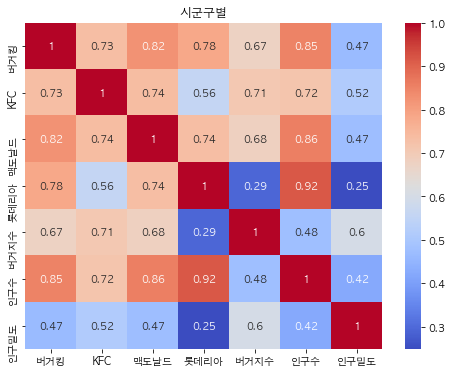

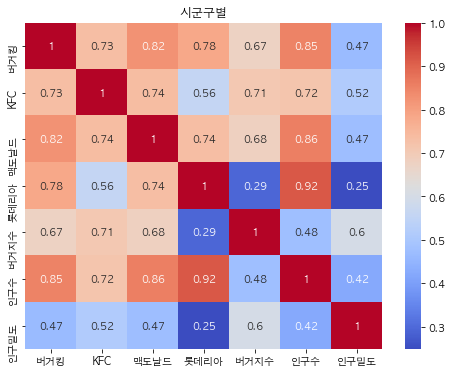

In [24]:
test = final_df[['버거킹', 'KFC', '맥도날드', '롯데리아', '버거지수','인구수', '인구밀도']]
fig = plt.figure(figsize=(8,6))
sns.heatmap(test.corr(), annot=True, cmap='coolwarm')
plt.title("시군구별")
fig.savefig(output_path +"burger-pop-heatmap.png")
fig

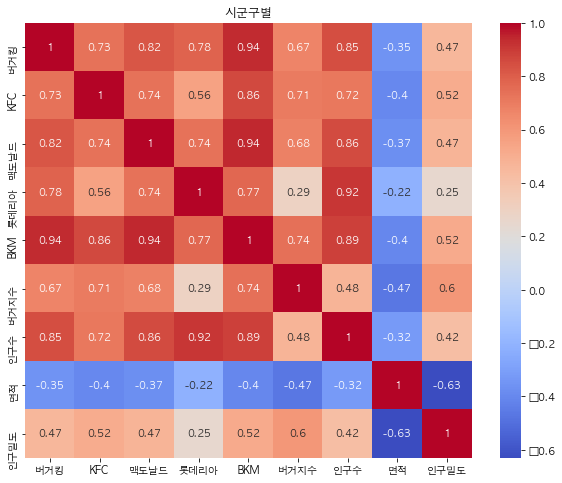

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(final_df.corr(), annot=True, cmap='coolwarm')
plt.title("시군구별")
plt.show()

# 브랜드별 상관관계 분석
## 브랜드별 전체 매장수

In [32]:
# brand_df 
# brand_df = nstore_stat_df[['버거킹', 'KFC', '롯데리아','맥도날드']]
brand_df = final_df[['버거킹', 'KFC', '롯데리아','맥도날드']]
brand_df.sum()

버거킹      410
KFC      187
롯데리아    1304
맥도날드     405
dtype: int64

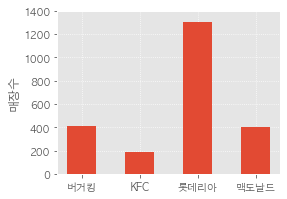

In [27]:
fig = plt.figure(figsize=(4,3))
plt.style.use("ggplot")
plt.bar(['버거킹', 'KFC', '롯데리아','맥도날드'], brand_df.sum(), width=0.5, label='2021')
plt.grid(True, linestyle=':')
plt.ylabel('매장수')
plt.ylim(0,1400)

fig.savefig(output_path+"total-nstore-barplot.png")

In [28]:
BMK = brand_df.to_numpy().T
BMK.shape # index - 0:버거킹, 1:KFC, 2:맥도날드, 3:롯데리아

(4, 17)

## 매장별 상관관계

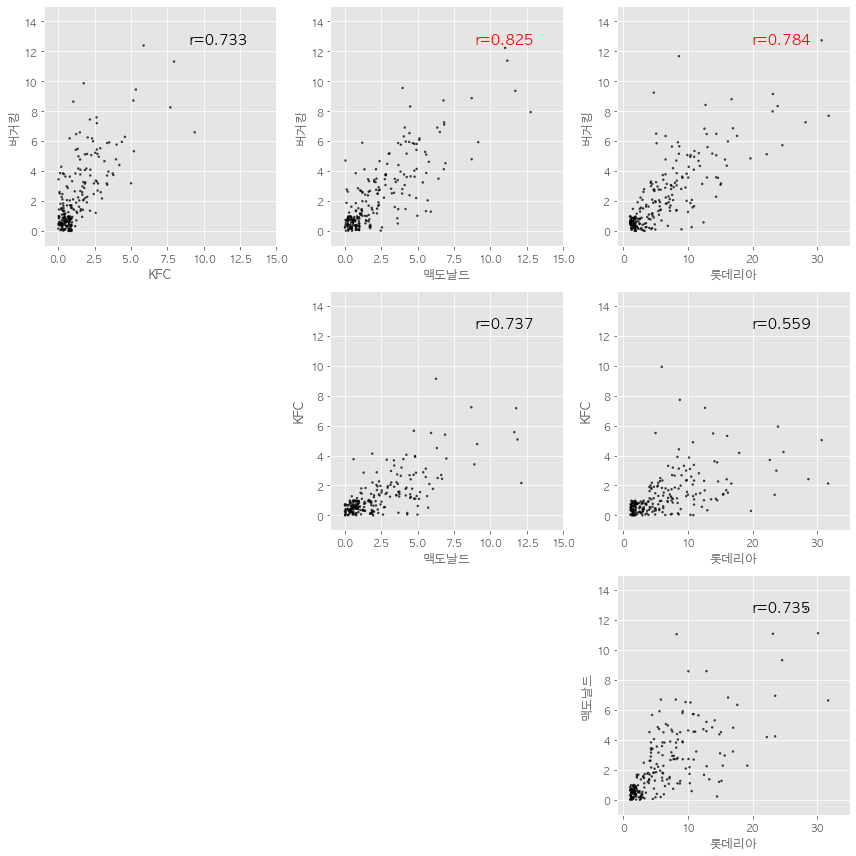

In [35]:
import scipy.stats

fig = plt.figure(figsize=(12,12))

def plot_nstores3(b1, b2, label1, label2):
    plt.scatter(brand_df[b1] + np.random.random(len(brand_df)),
                brand_df[b2] + np.random.random(len(brand_df)),
                edgecolor='none', alpha=0.75, s=6, c='black')
    plt.xlim(-1, 15 if (b1 != '롯데리아') & (b1 != '맘스터치') else 35)
    plt.ylim(-1, 15 if (b2 != '롯데리아') & (b2 != '맘스터치') else 35)
    plt.xlabel(label1)
    plt.ylabel(label2)

    r = scipy.stats.pearsonr(brand_df[b1], brand_df[b2])

    if r[0]>=0.75:
        color='red'
    elif r[0]<0.5:
        color='blue'
    else:
        color='black'

    plt.annotate('r={:.3f}'.format(r[0]), (9 if (b1 != '롯데리아') & (b1 != '맘스터치') else 20,
                                          12.5 if (b2 != '롯데리아') &(b2 != '맘스터치') else 20),
                 fontsize=14, color=color)
bgbrands = [
            ('버거킹', '버거킹'), ('KFC', 'KFC'),('맥도날드', '맥도날드'),('롯데리아','롯데리아')
]

for a in range(len(bgbrands) - 1):
    for b in range(1, len(bgbrands)):
        if a >= b:
            continue
        ax = fig.add_subplot(len(bgbrands)-1, len(bgbrands)-1, a * 3 + b)
        acol, alabel = bgbrands[a]
        bcol, blabel = bgbrands[b]
        plot_nstores3(bcol, acol, blabel, alabel)

plt.tight_layout()
fig.savefig(output_path+"brand-scatter.png")